In [3]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
 

In [4]:
from google.colab import files
uploaded = files.upload()

Saving pulsar_data_train.csv to pulsar_data_train.csv


In [5]:
import pandas as pd
import io
df_pulsar = pd.read_csv(io.StringIO(uploaded['pulsar_data_train.csv'].decode('utf-8')),header=0)
df_pulsar.columns =['M IP', 'SD IP', 'EK IP', 'S IP', 'M DM-SNR', 'SD DM-SNR', 'EK DM-SNR', 'S DM-SNR', 'Target']


In [115]:
NAs = pd.concat([df_pulsar.isnull().sum()], axis=1, keys=['Train'])
print(NAs)
NAs[NAs.sum(axis=1) > 0]

           Train
M IP           0
SD IP          0
EK IP       1735
S IP           0
M DM-SNR       0
SD DM-SNR   1178
EK DM-SNR      0
S DM-SNR     625
Target         0


,Train
EK IP,1735
SD DM-SNR,1178
S DM-SNR,625


In [6]:
df_pulsar.corr()

,M IP,SD IP,EK IP,S IP,M DM-SNR,SD DM-SNR,EK DM-SNR,S DM-SNR,Target
M IP,1.000000,0.551105,-0.872595,-0.737598,-0.298123,-0.313845,0.235781,0.146782,-0.676129
SD IP,0.551105,1.000000,-0.527779,-0.539896,-0.001656,-0.058241,0.031671,0.028757,-0.365757
EK IP,-0.872595,-0.527779,1.000000,0.944648,0.414739,0.439037,-0.341394,-0.214991,0.791661
S IP,-0.737598,-0.539896,0.944648,1.000000,0.412659,0.420058,-0.328675,-0.204148,0.707086
M DM-SNR,-0.298123,-0.001656,0.414739,0.412659,1.000000,0.797974,-0.616385,-0.353898,0.400375
SD DM-SNR,-0.313845,-0.058241,0.439037,0.420058,0.797974,1.000000,-0.808061,-0.574594,0.497210
EK DM-SNR,0.235781,0.031671,-0.341394,-0.328675,-0.616385,-0.808061,1.000000,0.924264,-0.389788
S DM-SNR,0.146782,0.028757,-0.214991,-0.204148,-0.353898,-0.574594,0.924264,1.000000,-0.259065
Target,-0.676129,-0.365757,0.791661,0.707086,0.400375,0.497210,-0.389788,-0.259065,1.000000


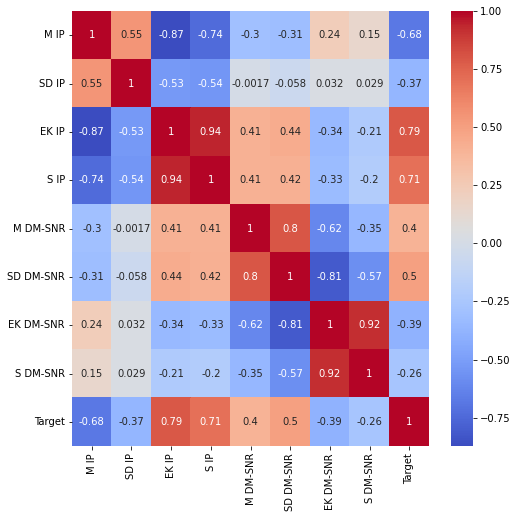

In [7]:
plt.figure(figsize = (8,8))
sns.heatmap(df_pulsar.corr(), annot=True, cmap='coolwarm')

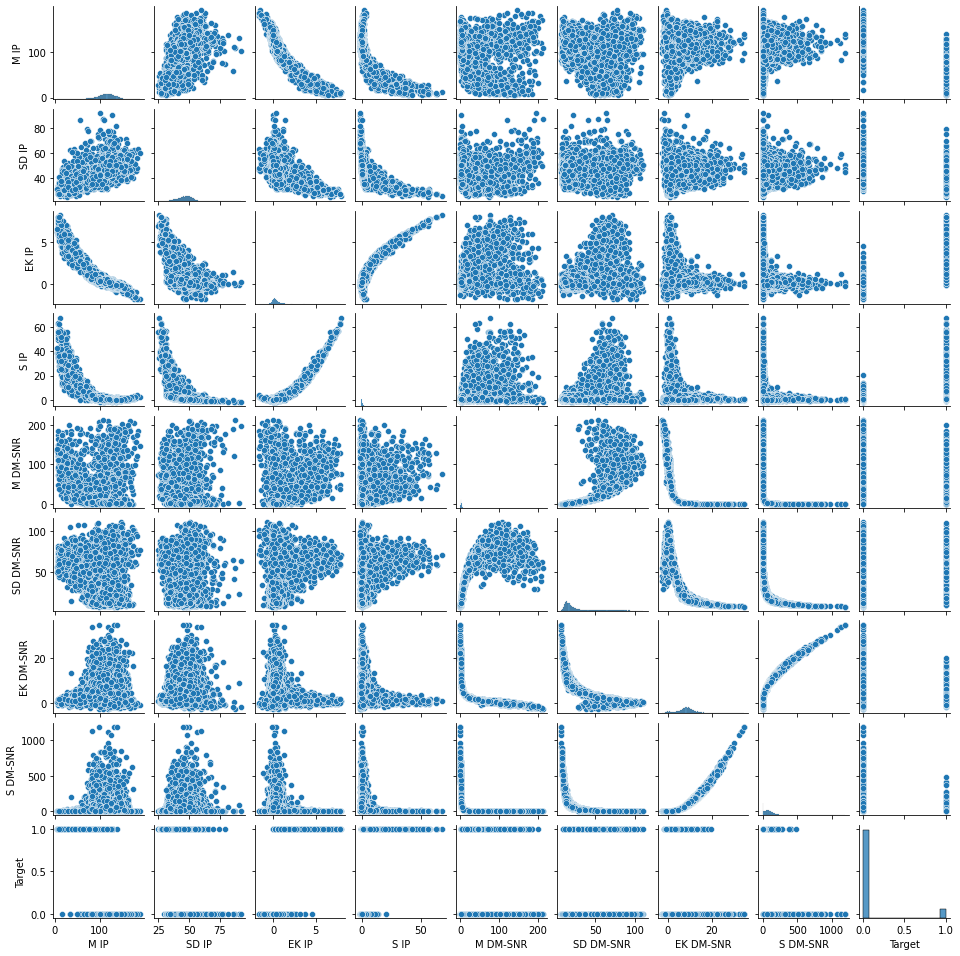

In [8]:
pulsar_pairplot = df_pulsar.dropna()
pulsar_pairplot.to_excel('pulsar.xlsx')
sns.pairplot(pulsar_pairplot, height=1.5)

In [9]:
print(df_pulsar['Target'].value_counts())

0.0    11375
1.0     1153
Name: Target, dtype: int64


In [10]:
# Separate majority and minority classes
df_majority = df_pulsar.loc[df_pulsar['Target']==0]
df_minority = df_pulsar.loc[df_pulsar['Target']==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=3553,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Target.value_counts()

0.0    3553
1.0    1153
Name: Target, dtype: int64

In [ ]:
# df.loc[df[‘column’] condition, ‘new column name’] = ‘value if condition is met’
# this piece of code checks for the condition, and based on the truth of the condition, puts some value in the column mentioned

In [12]:
from google.colab import files
uploaded = files.upload()

Saving pulsar_data_test.csv to pulsar_data_test.csv


In [102]:
df_pulsar_test_upload = pd.read_csv(io.StringIO(uploaded['pulsar_data_test.csv'].decode('utf-8')),header=0)
df_pulsar_test_upload.columns =['M IP', 'SD IP', 'EK IP', 'S IP', 'M DM-SNR', 'SD DM-SNR', 'EK DM-SNR', 'S DM-SNR','Target']
# X_test = df_pulsar_test.dropna(axis=1)

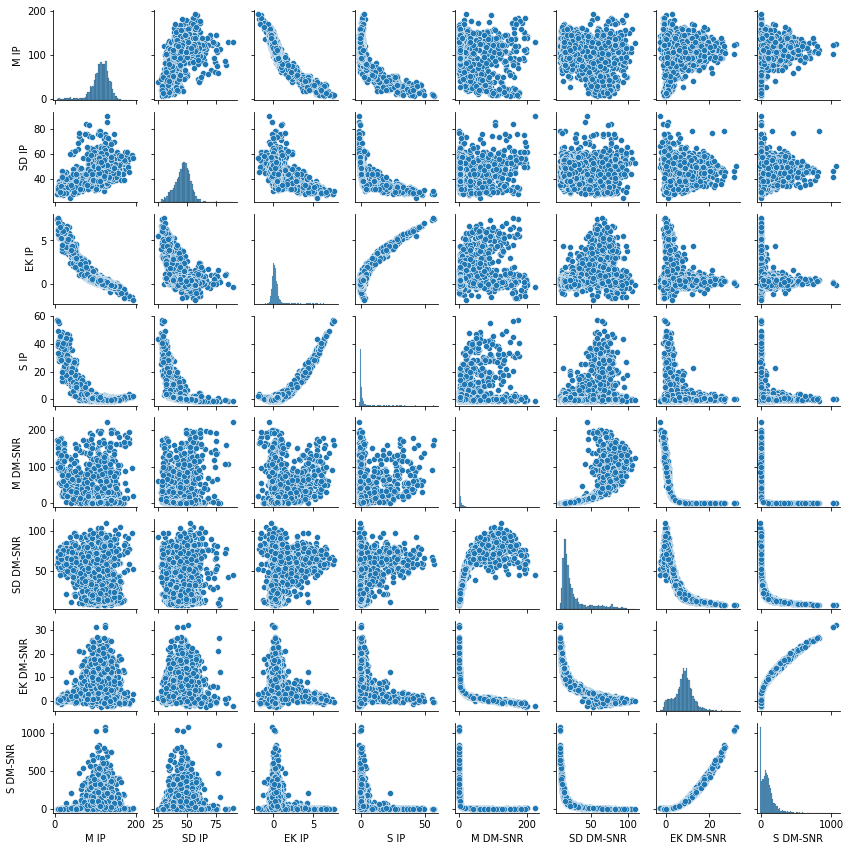

In [100]:
df_pulsar_test_upload1 = df_pulsar_test_upload.drop('Target',axis=1)
pulsar_pairplot_upload_test = df_pulsar_test_upload1.dropna()
pulsar_pairplot_upload_test.to_excel('pulsar_test_upload.xlsx')
sns.pairplot(pulsar_pairplot_upload_test, height=1.5)

In [103]:
NAs = pd.concat([df_pulsar_test_upload.isnull().sum()], axis=1, keys=['Test'])
print(NAs)
NAs[NAs.sum(axis=1) > 0]

           Test
M IP          0
SD IP         0
EK IP       767
S IP          0
M DM-SNR      0
SD DM-SNR   524
EK DM-SNR     0
S DM-SNR    244
Target     5370


,Test
EK IP,767
SD DM-SNR,524
S DM-SNR,244
Target,5370


In [104]:
df_pulsar_test_upload['M IP'][2]
df_pulsar_test = df_pulsar_test_upload.drop('Target', axis=1)

In [ ]:
# EK IP related to M IP and S IP
# SD DM-SNR inversely related to S DM-SNR EK DM-SNR`
# S DM-SNR related to EK DM-SNR

# data = {'column1': ['a', 'a', 'a', 'b', 'c'], 
        # 'column2': [1, 4, 2, 5, 3]}
# df = pd.DataFrame(data, columns = ['column1', 'column2'])
# to convert a dictionary to dataframe

In [105]:
df_not_null = df_pulsar_test.dropna(axis = 0)
df_EK_IP = df_not_null[['M IP','S IP']]
df_EK_IP_target = df_not_null['EK IP']
df_S_DMSNR = df_not_null[['EK DM-SNR']]
df_S_DMSNR_target = df_not_null['S DM-SNR']
df_SD_DMSNR = df_not_null[['M DM-SNR']]
df_SD_DMSNR_target = df_not_null['SD DM-SNR']

In [106]:
# def fillMissingValues_EK_IP:
X_train_EK_IP,X_test_EK_IP,Y_train_EK_IP,Y_test_EK_IP = train_test_split(df_EK_IP,df_EK_IP_target, test_size = 0.25, random_state = 42)
regressor1= LinearRegression()  
regressor1.fit(X_train_EK_IP, Y_train_EK_IP)  
# df_EK_IP_null =  df_pulsar_test[df_pulsar_test['EK IP'].isnull()]
# y_pred_EK_IP_null = regressor1.predict(df_EK_IP_null[['M IP','S IP']])
# k=0
for j in range(df_pulsar_test.shape[0]):
  if np.isnan(df_pulsar_test['EK IP'][j]):
    y_pred_EK_IP_null = regressor1.predict(((df_pulsar_test[['M IP','S IP']]).loc[j]).to_numpy().reshape(1,-1))
    df_pulsar_test['EK IP'][j] = y_pred_EK_IP_null

In [87]:
df_pulsar_test[['EK DM-SNR']].loc[2].to_numpy().reshape(-1,1).shape

(1, 1)

In [107]:
# def fillMissingValues_S_DM_SNR:
X_train_S_DMSNR,X_test_S_DMSNR,Y_train_S_DMSNR,Y_test_S_DMSNR = train_test_split(df_S_DMSNR,df_S_DMSNR_target, test_size = 0.25, random_state = 42)
regressor2= LinearRegression()  
regressor2.fit(X_train_S_DMSNR, Y_train_S_DMSNR) 
# df_S_DM-SNR_null =  df_pulsar_test[df_pulsar_test['S DM-SNR'].isnull()]
# y_pred_S_DM_SNR_null = regressor2.predict(df_EK_IP_null['EK DM-SNR'])
for j in range(df_pulsar_test.shape[0]):
  if np.isnan(df_pulsar_test['S DM-SNR'][j]):
    y_pred_S_DM_SNR_null = regressor2.predict(df_pulsar_test[['EK DM-SNR']].loc[j].to_numpy().reshape(-1,1))
    df_pulsar_test['S DM-SNR'][j] = y_pred_S_DM_SNR_null

In [108]:
# def fillMissingValues_SD_DM_SNR:
X_train_SD_DMSNR,X_test_SD_DMSNR,Y_train_SD_DMSNR,Y_test_SD_DMSNR = train_test_split(df_SD_DMSNR,df_SD_DMSNR_target, test_size = 0.25, random_state = 42)
regressor3= LinearRegression()  
regressor3.fit(X_train_SD_DMSNR, Y_train_SD_DMSNR) 
# df_SD_DM_SNR_null =  df_pulsar_test[df_pulsar_test['SD DM-SNR'].isnull()]
# y_pred_SD_DM_SNR_null = regressor3.predict(df_EK_IP_null['S DM-SNR'])
for j in range(df_pulsar_test.shape[0]):
  if np.isnan(df_pulsar_test['SD DM-SNR'][j]):
    y_pred_SD_DM_SNR_null = regressor3.predict(((df_pulsar_test[['M DM-SNR']]).loc[j]).to_numpy().reshape(1,-1))
    df_pulsar_test['SD DM-SNR'][j] = y_pred_SD_DM_SNR_null


In [111]:
X_test = df_pulsar_test

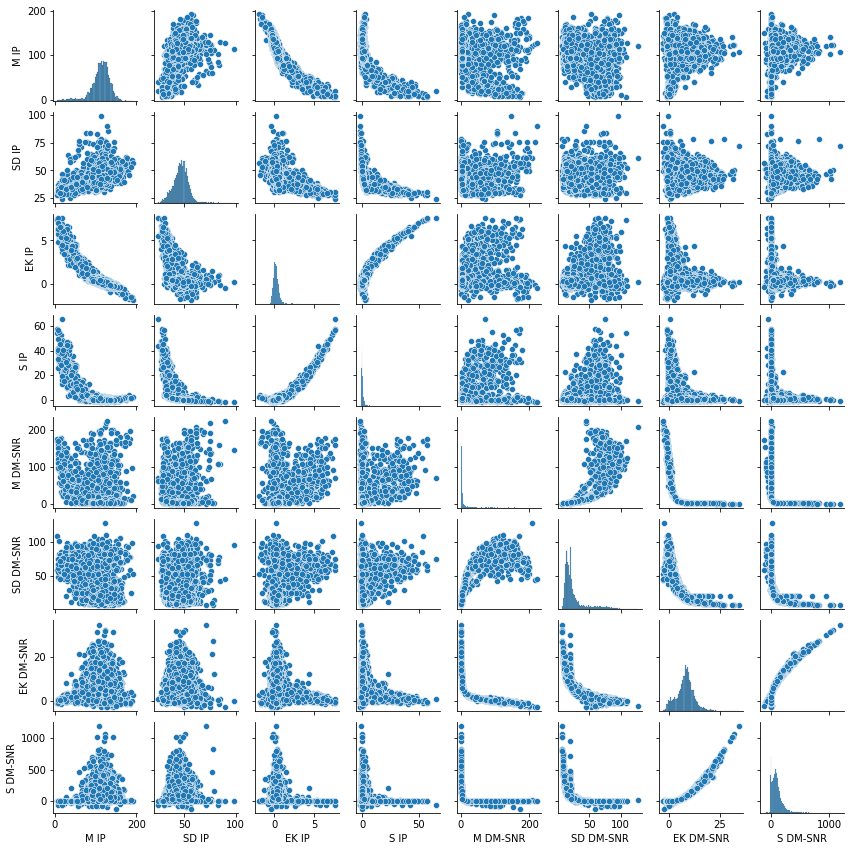

In [109]:
pulsar_pairplot_test = df_pulsar_test.dropna()
pulsar_pairplot_test.to_excel('pulsar_test.xlsx')
sns.pairplot(pulsar_pairplot_test, height=1.5)

In [119]:
df_downsampled = df_downsampled.dropna()
Y_train = df_downsampled['Target']
X_train = df_downsampled.drop('Target', axis=1)
scaler = MinMaxScaler()
scaled_train_X = scaler.fit_transform(X_train)
scaled_test_X = scaler.fit_transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_train_X,Y_train)
Y_pred=clf.predict(scaled_test_X)


In [121]:
df_new = pd.DataFrame(Y_pred, columns=["Target"])
df_new.to_csv('pulsar.csv')